In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [116]:
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [117]:
df["BMI"] = (df["weight"] / (df["height"] / 100) ** 2)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [118]:
df["overweight"] = df["BMI"].map(lambda x: 1 if x >= 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [119]:
df["cholesterol"] = df["cholesterol"].map(lambda x: 0 if x == 1 else 1)
df["gluc"] = df["gluc"].map(lambda x: 0 if x == 1 else 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [120]:
value_vars = [
    "active",
    "alco",
    "cholesterol",
    "gluc",
    "overweight",
    "smoke",
]

df_cat = pd.melt(df, id_vars=["cardio"], value_vars=value_vars) # partially correct?
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [121]:
df_cat_counts = df_cat.groupby(["variable", "value"]).value_counts().to_frame().rename(columns={"count":"total"}) # almost - need to split values along cardio being 0 or 1
df_cat_counts

total
variable    value cardio       
active      0     1        7361
                  0        6378
            1     0       28643
                  1       27618
alco        0     1       33156
                  0       33080
            1     0        1941
                  1        1823
cholesterol 0     0       29330
                  1       23055
            1     1       11924
                  0        5691
gluc        0     0       30894
                  1       28585
            1     1        6394
                  0        4127
overweight  0     0       15908
                  1       10532
            1     1       24447
                  0       19113
smoke       0     1       32050
                  0       31781
            1     0        3240
                  1        2929

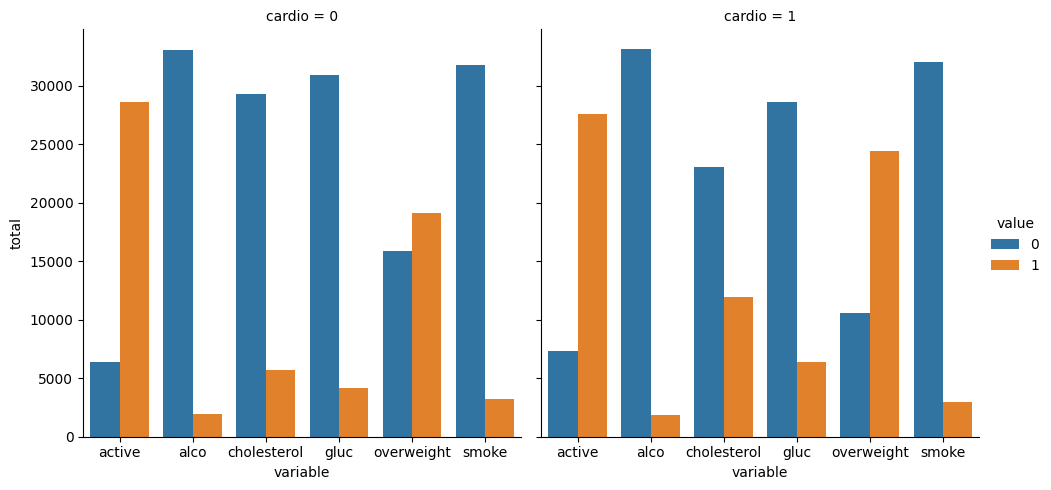

In [122]:
sns.catplot(df_cat_counts, kind="bar", x="variable", hue="value", y="total", col="cardio")

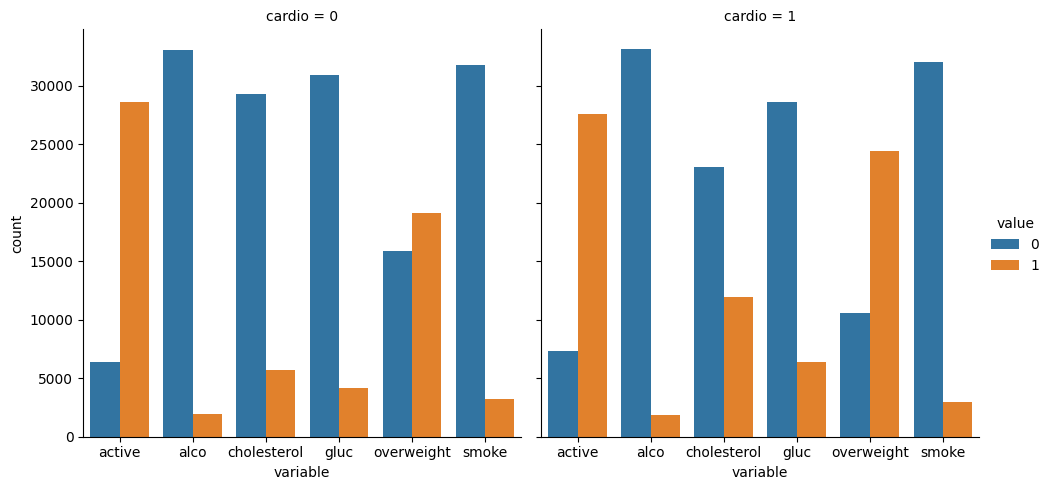

In [155]:
fig = sns.catplot(df_cat, kind="count", x="variable", hue="value", col="cardio") # getting there, still wrong, need y axis to be counts not frequency

In [180]:
fig.axes[0][1].get_children()

 Text(0.5, 1.0, 'cardio = 1'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [124]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [125]:
bp_condition = df["ap_lo"] <= df["ap_hi"]
df_heat = df[bp_condition]

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [126]:
False in df_heat["ap_lo"] <= df_heat["ap_hi"]

False

In [127]:
df.drop(columns="BMI", inplace=True)

bp_condition = df["ap_lo"] <= df["ap_hi"]
height_condition = (df["height"] >= df["height"].quantile(0.025)) & (df["height"] <= df["height"].quantile(0.975))
weight_condition = (df["weight"] >= df["weight"].quantile(0.025)) & (df["weight"] <= df["weight"].quantile(0.975))
df_heat = df[bp_condition & height_condition & weight_condition]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [146]:
corr = df_heat.corr()
print(len(corr))
# mask = np.vectorize(lambda x: True if x == 1. else False)(np.tril(np.ones(corr.shape), k=-1))
arr = np.array([True for i in range(len(corr) ** 2)]).reshape(corr.shape)
# print(arr)
mask = np.triu(arr, k=1)
# print(mask)

14


<Axes: >

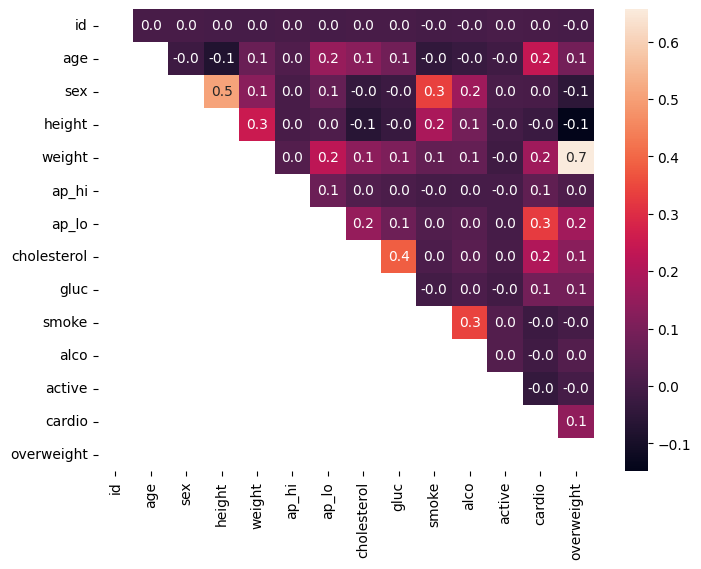

In [149]:
# corr = corr[mask] # wrong - removes rows and doesn't keep original shape of corr
corr = corr.where(mask) # correct since it keeps shape
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".1f")

In [153]:
fig.axes

[<Axes: >, <Axes: label='<colorbar>'>]

In [154]:
ax

<Axes: >